<a href="https://colab.research.google.com/github/P-Karthikeya512/Basics-of-Pytorch/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [2]:
import os
os.getcwd()

'/content'

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df["Heart Disease"] = df["Heart Disease"].str.strip()
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})


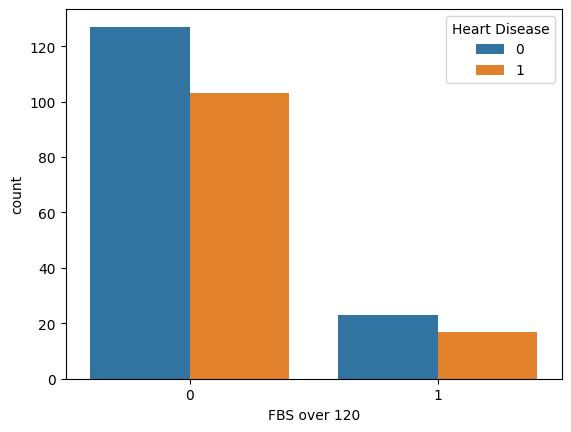

In [5]:
# df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})
# print(df["Exercise angina"].dtype)

import seaborn as sns
sns.countplot(x="FBS over 120", hue="Heart Disease", data=df)
plt.show()

In [6]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [7]:
result_df = df['Heart Disease']
df = df.drop(['Heart Disease', 'Sex','FBS over 120', 'EKG results', "Max HR", 'Exercise angina', 'ST depression'], axis=1)

In [8]:
df = df.drop(['Slope of ST', 'Number of vessels fluro'], axis=1)

In [9]:
df.head()

,Age,Chest pain type,BP,Cholesterol,Thallium
0,70,4,130,322,3
1,67,3,115,564,7
2,57,2,124,261,7
3,64,4,128,263,7
4,74,2,120,269,3


In [10]:
X = torch.tensor(df.values, dtype=torch.float32)
y = torch.tensor(result_df.values, dtype=torch.float32).view(-1, 1)

In [11]:
len_data = int(0.9 * len(X))
X_train = X[:len_data]
y_train = y[:len_data]
X_test = X[len_data:]
y_test = y[len_data:]
X_train = (X_train - X_train.mean(0)) / X_train.std(0)
X_test  = (X_test - X_test.mean(0)) / X_test.std(0)
print(y_train.mean())
# print(y_train.unique())
# X_train.shape

tensor(0.4403)


In [12]:

import torch.nn as nn

class Model(nn.Module):
    def __init__(self, inputDim):
        super().__init__()
        self.linear = nn.Linear(inputDim, 1)

    def forward(self, x):
        return self.linear(x)
model = Model(X_train.shape[1])

In [13]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [14]:
for epoch in range(1000):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Loss:", loss.item())


Loss: 0.6230074167251587
Loss: 0.4542650282382965
Loss: 0.45047059655189514
Loss: 0.45040708780288696
Loss: 0.4504067301750183
Loss: 0.4504067301750183
Loss: 0.4504067301750183
Loss: 0.4504067599773407
Loss: 0.4504067599773407
Loss: 0.4504067599773407


In [16]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    loss_test = criterion(logits, y_test)
    probs = torch.sigmoid(logits)
    y_pred = (probs > 0.5).float()
    accuracy = (y_pred == y_test).float().mean()

print("Test Loss:", loss_test.item())
print("Test Accuracy:", accuracy.item())


Test Loss: 0.6135033369064331
Test Accuracy: 0.7407407164573669
